In [1]:
# Homework:
# Write your own leapfrog scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0.5. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. (Hint: both stars will drift
# together first, and then being kicked at the middle step at the same time, 
# and then drfit again)

# So we have y[0]=x, y[1]=v_{x}, y[2]=y, y[3]=v_{y}

#Kyle Prerost
#PHYS 404
#HW 7
#February 24th, 2019

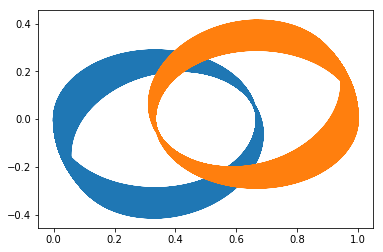

In [6]:
import numpy as np
import matplotlib.pyplot as plt

G=1
M=1.
tend=4.*np.pi*50.
h=0.01
#y1=[-1.,-0.5,-1.,1.]
#y2=[1.,0.5,1.,1.]
y1=[0.,0.,0.,.5]
y2=[1.,0.,0.,-.5]
t=0

def f(t, y1, y2):
    f=np.zeros(4)
    r=np.sqrt((y1[0]-y2[0])**2+(y1[2]-y2[2])**2)
    f[0]=y1[1]
    f[1]=-G*M/r/r/r*(y1[0]-y2[0])
    f[2]=y1[3]
    f[3]=-G*M/r/r/r*(y1[2]-y2[2])
    return f
    
def lf(t, h, y1, y2, n):
    fv1=f(t, y1, y2)
    fv2=f(t, y2, y1)
    for i in [0,2]:
        y1[i]+=fv1[i]*h/2.
        y2[i]+=fv2[i]*h/2.
        
    fv1=f(t, y1, y2)
    fv2=f(t, y2, y1)
    for i in [1,3]:
        y1[i]+=fv1[i]*h
        y2[i]+=fv2[i]*h
        
    fv1=f(t, y1, y2)
    fv2=f(t, y2, y1)
    for i in [0,2]:
        y1[i]+=fv1[i]*h/2.
        y2[i]+=fv2[i]*h/2.    
    return 0

xp1=[]
yp1=[]
xp2=[]
yp2=[]
ta=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    lf(t,h,y1,y2,8)
    xp1=np.append(xp1,y1[0])
    yp1=np.append(yp1,y1[2])
    xp2=np.append(xp2,y2[0])
    yp2=np.append(yp2,y2[2])
    ta=np.append(ta,t)
    t = t+h

plt.plot(xp1,yp1)
plt.plot(xp2,yp2)
plt.show()